In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# remove pandas column count limit
pd.set_option('display.max_columns', None)

In [2]:
# Select the features for correlation matrix
selected_features = ['id','deviceid','trip_id','speed','acceleration','radial_acceleration','distance_from_start','acceleration_der','bus_stop']


In [3]:
data = pd.read_csv('../DataOut/bus_trip_all_points_with_acceleration_and_radial_acceleration_and_distance_and_accDiff.csv')


In [4]:
# get my data trip id == 4890
data[data['trip_id']==2370]

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
241177,560490033,123,2021-10-01 09:11:27,7.293137,80.635765,0.00000,2021-10-01,09:11:27,POINT (184767.5840368192 232327.72943514792),NaN,2370.0,1,166,-0.415352,0.000000,0.000000,NaN,NaN,0.000000
241178,560490215,123,2021-10-01 09:11:33,7.293133,80.635833,2.69978,2021-10-01,09:11:33,POINT (184775.1252810224 232327.36224222518),NaN,2370.0,1,166,0.449963,0.016224,7.542102,0 days 00:00:06,0.865315,0.144219
241179,560491463,123,2021-10-01 09:11:48,7.293137,80.636227,5.39957,2021-10-01,09:11:48,POINT (184818.55166502894 232327.71411012457),NaN,2370.0,1,166,0.179986,0.012674,50.922804,0 days 00:00:15,-0.269977,-0.017998
241180,560491462,123,2021-10-01 09:12:03,7.293127,80.636852,7.55940,2021-10-01,09:12:03,POINT (184887.56079506013 232326.58761884997),NaN,2370.0,1,166,0.143989,0.058331,119.866348,0 days 00:00:15,-0.035997,-0.002400
241181,560491461,123,2021-10-01 09:12:10,7.293105,80.637165,8.09935,2021-10-01,09:12:10,POINT (184922.16418700397 232324.18871084476),NaN,2370.0,1,166,0.077136,0.088413,154.516247,0 days 00:00:07,-0.066853,-0.009550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241330,560581944,123,2021-10-01 10:00:35,7.297490,80.732497,1.07991,2021-10-01,10:00:35,POINT (195448.24314158212 232807.06548572614),NaN,2370.0,1,166,-0.031984,0.000039,14186.677147,0 days 00:09:34,0.076003,0.000132
241331,560582101,123,2021-10-01 10:00:39,7.297607,80.732742,3.77970,2021-10-01,10:00:39,POINT (195475.29563535625 232819.95702541425),NaN,2370.0,1,166,0.674948,0.268127,14216.648682,0 days 00:00:04,0.706931,0.176733
241332,560582104,123,2021-10-01 10:00:40,7.297657,80.732790,4.31966,2021-10-01,10:00:40,POINT (195480.64013873175 232825.48567381437),NaN,2370.0,1,166,0.539960,0.069841,14224.356314,0 days 00:00:01,-0.134988,-0.134988
241333,560583598,123,2021-10-01 10:00:55,7.298780,80.733387,11.87910,2021-10-01,10:00:55,POINT (195546.52353877638 232949.69701646626),NaN,2370.0,1,166,0.503963,0.672795,14365.534053,0 days 00:00:15,-0.035997,-0.002400


In [5]:
# set Nan in bus_stop to 0
data['bus_stop']=data['bus_stop'].fillna(0)
datain_one_direction=data[data['direction']==1]
datain_one_direction=datain_one_direction[selected_features]

In [6]:
# get the number of unique trip ids
unique_trip_ids = datain_one_direction['trip_id'].unique()
len(unique_trip_ids)

2552

In [7]:
# print a list of unique trip ids
trip_ids = datain_one_direction['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428, 430, 432, 434

In [8]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159802,1310926397,262,2022-08-09 10:55:05,7.290370,80.638812,20.51840,2022-08-09,10:55:05,POINT (185103.88471817068 232021.69189563429),0,5586.0,2,226,-0.539900,4.312238,16062.472333,0 days 00:00:01,-0.694171,-0.694171
1159803,1310926396,262,2022-08-09 10:55:37,7.291380,80.637410,7.55940,2022-08-09,10:55:37,POINT (184949.15914480377 232133.4259444512),0,5586.0,2,226,-0.404969,0.096588,16253.551165,0 days 00:00:32,0.134931,0.004217
1159804,1310926395,262,2022-08-09 10:55:38,7.291392,80.637387,7.55940,2022-08-09,10:55:38,POINT (184946.57580228115 232134.70946937904),0,5586.0,2,226,0.000000,0.588683,16256.436454,0 days 00:00:01,0.404969,0.404969
1159805,1310926393,262,2022-08-09 10:55:53,7.291295,80.636463,12.95900,2022-08-09,10:55:53,POINT (184844.62591334787 232124.05764201845),0,5586.0,2,226,0.359973,0.563965,16358.837456,0 days 00:00:15,0.359973,0.023998


In [9]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101
...,...,...,...,...,...,...,...,...,...
582758,1310920500,262,5587.0,2.15983,-0.057853,0.017268,16959.169925,-0.014922,0
582759,1310920499,262,5587.0,2.15983,0.000000,0.050073,17123.789768,0.001653,0
582760,1310920498,262,5587.0,2.69978,0.539950,0.056444,17175.357332,0.539950,0
582761,1310920497,262,5587.0,5.39957,0.674947,0.062833,17309.762484,0.033749,0


In [10]:
busstops=[]
start_and_end_distances_to_busstops=[]
prev_stop=0
current_stop=0
# iterate through rows in dataframes_without_trip_id[1]
for index, row in datain_one_direction[datain_one_direction['trip_id']==4].iterrows():
    current_stop=row['bus_stop']
    if current_stop!=prev_stop:
        if prev_stop==0:
            busstops.append(current_stop)
            start_point=int(row['distance_from_start'])   
        else:
            end_point=int(row['distance_from_start'])
            start_and_end_distances_to_busstops.append([start_point,end_point])
    prev_stop=current_stop

In [11]:
print(busstops, start_and_end_distances_to_busstops)

['101', '102', '103', '104', '105', '106', '107', '108', '110', '111', '112', '113', '114', 'BT02'] [[371, 531], [1399, 1718], [3534, 3699], [5029, 5261], [5909, 6180], [7120, 7334], [7495, 7757], [8087, 8369], [8087, 8588], [9603, 9820], [10703, 10938], [12058, 12257], [13144, 13361], [14019, 14180]]


In [12]:
temp_df=pd.DataFrame()
for x in datain_one_direction.trip_id.unique():
    df=datain_one_direction[datain_one_direction['trip_id']==x]
    i=0
    for index, row in df.iterrows():
        if row['bus_stop']==0:
            datain_one_direction.loc[index,'segment']=i+1
        elif row['bus_stop']==busstops[i]:
            datain_one_direction.loc[index,'segment']=0
            i+=1
        else:
            datain_one_direction.loc[index,'segment']=0

In [13]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,1.0
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,1.0
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,1.0
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,1.0
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,0.0
...,...,...,...,...,...,...,...,...,...,...
582758,1310920500,262,5587.0,2.15983,-0.057853,0.017268,16959.169925,-0.014922,0,6.0
582759,1310920499,262,5587.0,2.15983,0.000000,0.050073,17123.789768,0.001653,0,6.0
582760,1310920498,262,5587.0,2.69978,0.539950,0.056444,17175.357332,0.539950,0,6.0
582761,1310920497,262,5587.0,5.39957,0.674947,0.062833,17309.762484,0.033749,0,6.0


In [14]:
df_for_segment_avg=datain_one_direction[datain_one_direction['segment']!=0]
# drop the columns that are not needed
df_for_segment_avg=df_for_segment_avg.drop(columns=['distance_from_start','bus_stop','id'])

df_for_busstop_avg=datain_one_direction[datain_one_direction['bus_stop']!=0]
# drop the columns that are not needed
df_for_busstop_avg=df_for_busstop_avg.drop(columns=['distance_from_start','segment','id'])

In [15]:
df_for_segment_avg

,deviceid,trip_id,speed,acceleration,radial_acceleration,acceleration_der,segment
0,116,2.0,14.03890,0.323975,0.000000,0.000000,1.0
1,116,2.0,10.25920,-0.251980,1.278067,-0.038397,1.0
2,116,2.0,7.55940,-0.179987,0.722300,0.004800,1.0
3,116,2.0,3.77970,-0.251980,0.048332,-0.004800,1.0
10,116,2.0,9.17927,0.179986,0.546434,-0.016799,2.0
...,...,...,...,...,...,...,...
582757,262,5587.0,3.77970,0.359973,0.062196,-0.059994,6.0
582758,262,5587.0,2.15983,-0.057853,0.017268,-0.014922,6.0
582759,262,5587.0,2.15983,0.000000,0.050073,0.001653,6.0
582760,262,5587.0,2.69978,0.539950,0.056444,0.539950,6.0


In [16]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159802,1310926397,262,2022-08-09 10:55:05,7.290370,80.638812,20.51840,2022-08-09,10:55:05,POINT (185103.88471817068 232021.69189563429),0,5586.0,2,226,-0.539900,4.312238,16062.472333,0 days 00:00:01,-0.694171,-0.694171
1159803,1310926396,262,2022-08-09 10:55:37,7.291380,80.637410,7.55940,2022-08-09,10:55:37,POINT (184949.15914480377 232133.4259444512),0,5586.0,2,226,-0.404969,0.096588,16253.551165,0 days 00:00:32,0.134931,0.004217
1159804,1310926395,262,2022-08-09 10:55:38,7.291392,80.637387,7.55940,2022-08-09,10:55:38,POINT (184946.57580228115 232134.70946937904),0,5586.0,2,226,0.000000,0.588683,16256.436454,0 days 00:00:01,0.404969,0.404969
1159805,1310926393,262,2022-08-09 10:55:53,7.291295,80.636463,12.95900,2022-08-09,10:55:53,POINT (184844.62591334787 232124.05764201845),0,5586.0,2,226,0.359973,0.563965,16358.837456,0 days 00:00:15,0.359973,0.023998


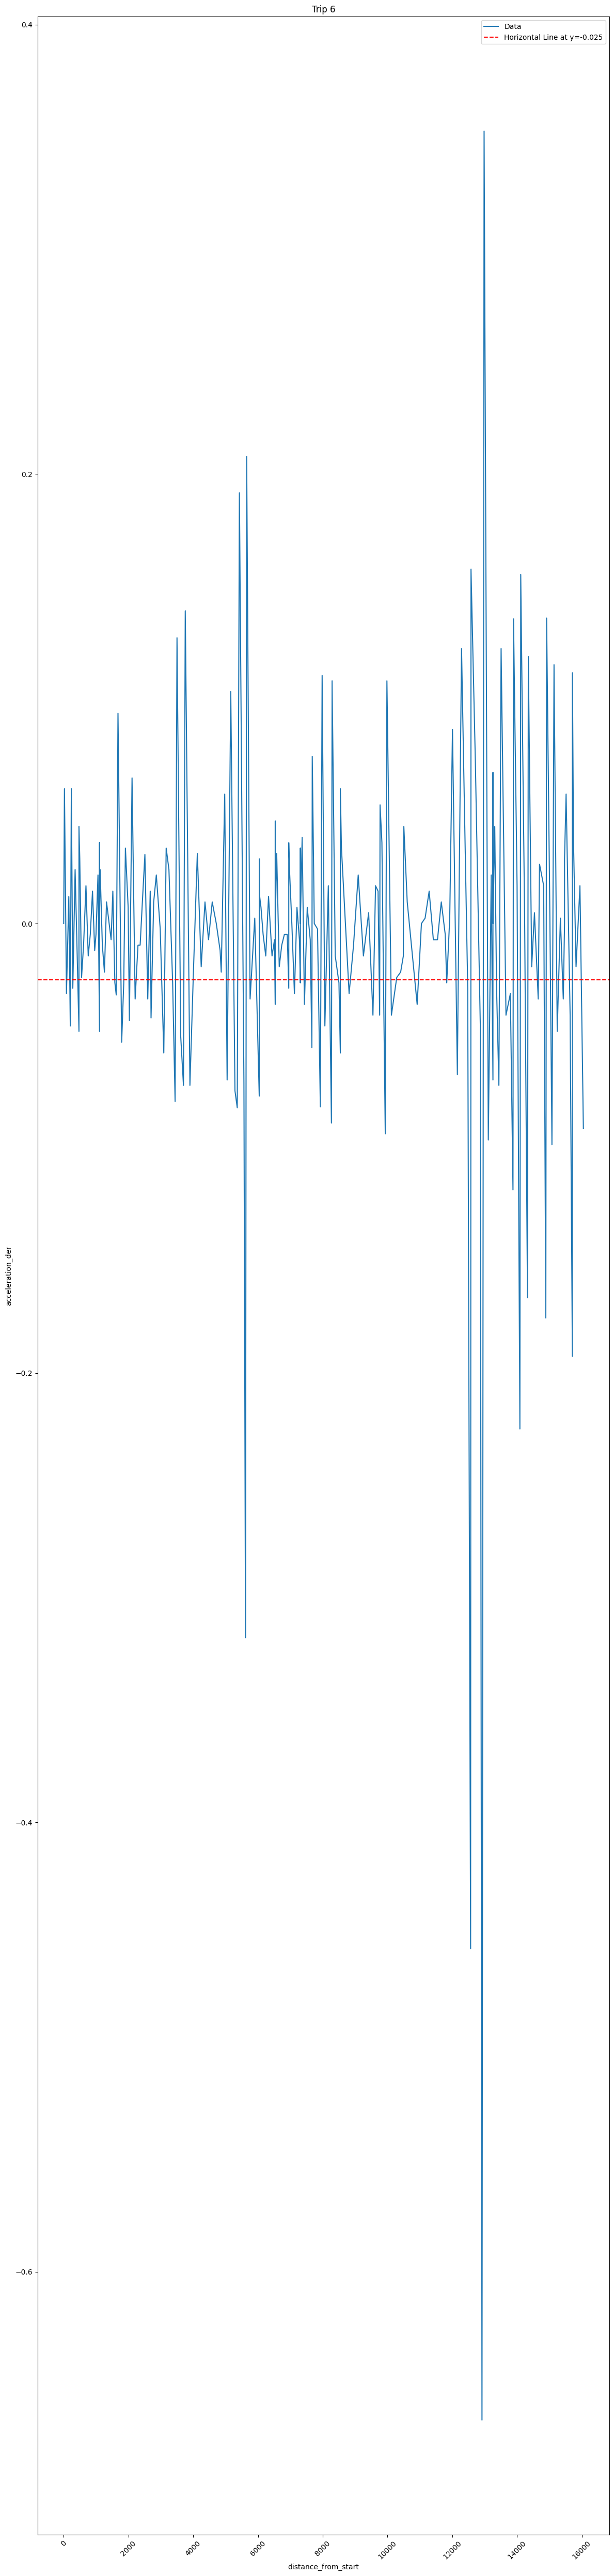

In [17]:
import matplotlib.pyplot as plt

columnx = 'distance_from_start'
columny = 'acceleration_der'
trip_id = 6

# Assuming 'data' is your DataFrame
df1 = data[(data['direction'] == 1) & (data['trip_id'] == 6)]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 50))

# Plot the data
ax.plot(df1[f"{columnx}"], df1[f"{columny}"], label='Data')
ax.set_xlabel(f"{columnx}")
ax.set_ylabel(f"{columny}")
ax.set_title("Trip " + str(trip_id))
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better visibility

# Add a horizontal line at the desired y-value (e.g., y=0)
horizontal_line_y = -0.025  # Change this to the desired y-value
ax.axhline(horizontal_line_y, color='red', linestyle='--', label=f'Horizontal Line at y={horizontal_line_y}')

# Add a legend to the plot
ax.legend()

# Adjust layout for better formatting
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
# take the mean of each feature grouped buy the deviceid and segment

# List of features you want to calculate the mean for
features_to_mean = ['deviceid','speed', 'acceleration', 'radial_acceleration']  # Replace with your actual feature names

# Group by 'deviceid' and 'segment', then calculate the mean for each feature
means = datain_one_direction.groupby(['trip_id', 'segment'])[features_to_mean].mean().reset_index()

# The 'means' DataFrame now contains the mean values for each feature, grouped by 'deviceid' and 'segment'
print(means)

       trip_id  segment  deviceid      speed  acceleration  \
0          2.0      0.0     116.0   6.414320     -0.073623   
1          2.0      1.0     116.0   8.909300     -0.089993   
2          2.0      2.0     116.0   8.140889      0.011076   
3          2.0      3.0     116.0   8.574518     -0.007302   
4          2.0      4.0     116.0  12.303306     -0.105420   
...        ...      ...       ...        ...           ...   
37594   5587.0      2.0     262.0   3.023758      0.166394   
37595   5587.0      3.0     262.0   2.221536     -0.021232   
37596   5587.0      4.0     262.0   2.429807      0.223977   
37597   5587.0      5.0     262.0   2.699783      0.393279   
37598   5587.0      6.0     262.0   7.183778      0.314882   

       radial_acceleration  
0                 0.345581  
1                 0.512175  
2                 0.469639  
3                 0.435498  
4                 0.376268  
...                    ...  
37594             0.078641  
37595             0.326

In [19]:
datain_one_direction

,id,deviceid,trip_id,speed,acceleration,radial_acceleration,distance_from_start,acceleration_der,bus_stop,segment
0,574733099,116,2.0,14.03890,0.323975,0.000000,0.000000,0.000000,0,1.0
1,574733100,116,2.0,10.25920,-0.251980,1.278067,123.738485,-0.038397,0,1.0
2,574733101,116,2.0,7.55940,-0.179987,0.722300,163.044397,0.004800,0,1.0
3,574733102,116,2.0,3.77970,-0.251980,0.048332,211.472339,-0.004800,0,1.0
4,574736662,116,2.0,9.17927,0.359971,1.052222,287.492821,0.040797,101,0.0
...,...,...,...,...,...,...,...,...,...,...
582758,1310920500,262,5587.0,2.15983,-0.057853,0.017268,16959.169925,-0.014922,0,6.0
582759,1310920499,262,5587.0,2.15983,0.000000,0.050073,17123.789768,0.001653,0,6.0
582760,1310920498,262,5587.0,2.69978,0.539950,0.056444,17175.357332,0.539950,0,6.0
582761,1310920497,262,5587.0,5.39957,0.674947,0.062833,17309.762484,0.033749,0,6.0


In [20]:
# Define the count_local_maxima_and_minima function
def count_local_maxima_and_minima(data):
    max_count = 0
    min_count = 0
    for i in range(1, len(data) - 1):
        if data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i - 1] and \
           data['acceleration_der'].iloc[i] > data['acceleration_der'].iloc[i + 1] and \
           data['acceleration_der'].iloc[i] > 0.01:
            max_count += 1
        elif data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i - 1] and \
             data['acceleration_der'].iloc[i] < data['acceleration_der'].iloc[i + 1] and \
             data['acceleration_der'].iloc[i] < -0.025:
            min_count += 1
    return max_count, min_count

# Group the data by 'segment' and 'trip_id' and apply the count_local_maxima_and_minima function to 'acceleration_der'
segment_maxima_minima_counts = datain_one_direction.groupby(['trip_id', 'deviceid', 'segment']).apply(count_local_maxima_and_minima)

# Convert the results into a DataFrame
segment_maxima_minima_counts = segment_maxima_minima_counts.apply(pd.Series)

# Reset the index to make 'trip_id', 'deviceid', and 'segment' regular columns
segment_maxima_minima_counts = segment_maxima_minima_counts.reset_index()

# Rename the columns for clarity
segment_maxima_minima_counts.columns = ['trip_id', 'deviceid', 'segment', 'throttle_count', 'break_count']

# The 'segment_maxima_minima_counts' DataFrame now contains the counts of local maxima and minima of 'acceleration_der' in each segment and trip_id
print(segment_maxima_minima_counts)


       trip_id  deviceid  segment  throttle_count  break_count
0          2.0       116      0.0              15           13
1          2.0       116      1.0               0            1
2          2.0       116      2.0               0            0
3          2.0       116      3.0               6            5
4          2.0       116      4.0               2            4
...        ...       ...      ...             ...          ...
37594   5587.0       262      2.0               2            1
37595   5587.0       262      3.0              10           10
37596   5587.0       262      4.0               4            4
37597   5587.0       262      5.0               4            3
37598   5587.0       262      6.0              20           17

[37599 rows x 5 columns]


In [21]:
# get the number of unique trip ids
unique_trip_ids = segment_maxima_minima_counts['trip_id'].unique()
len(unique_trip_ids)

2552

In [22]:
# lef join means and segment_maxima_minima_counts on trip_id and segment
means_and_maxima_minima_counts = pd.merge(means, segment_maxima_minima_counts, on=['trip_id', 'segment'], how='left')

In [44]:
# load the DataOut\bus_running_times_feature_added_all_moddedDF.csv csv file
bus_running_times_feature_added_all_moddedDF = pd.read_csv('../DataOut/bus_running_times_feature_added_all_moddedDF.csv')
bus_running_times_feature_added_all_moddedDF

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1)
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,74.0
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,6.0
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.0,6.1,Partially cloudy,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150701,3462.0,123.0,2.0,28.0,2022-10-31,18:45:44,18:47:23,0:01:39,99.0,0.8700,0.0,18.75,0.0,0,1,42.0,120.0,120.0,120.0,120.0,120.0,63.0,156.0,197.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,9.0
150702,3462.0,123.0,2.0,29.0,2022-10-31,18:47:38,18:50:23,0:02:45,165.0,1.4000,0.0,18.75,0.0,0,1,42.0,218.0,218.0,218.0,218.0,218.0,99.0,63.0,156.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0
150703,3462.0,123.0,2.0,30.0,2022-10-31,18:50:56,18:56:33,0:05:37,337.0,2.5600,0.0,18.75,0.0,0,1,42.0,391.0,391.0,391.0,391.0,391.0,165.0,99.0,63.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,33.0
150704,3462.0,123.0,2.0,31.0,2022-10-31,18:56:48,18:57:34,0:00:46,46.0,0.4200,0.0,18.75,0.0,0,1,42.0,65.0,65.0,65.0,65.0,65.0,337.0,165.0,99.0,18.0,31.0,10.0,22.2,0.0,4.3,Partially cloudy,15.0


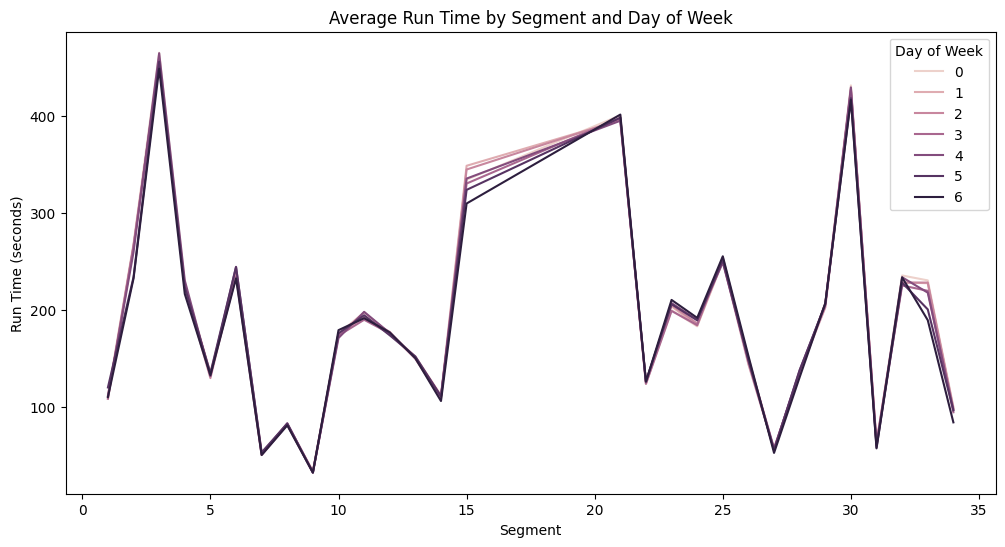

In [47]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_day_0f_week = bus_running_times_feature_added_all_moddedDF.groupby(['segment', 'day_of_week'])['run_time_in_seconds'].mean().reset_index()

# plot grp_by_day_0f_week dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_day_0f_week
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_day_0f_week, x='segment', y='run_time_in_seconds', hue='day_of_week')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average Run Time by Segment and Day of Week')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()


In [41]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,2.0,0.0,116.0,6.414320,-0.073623,0.345581,116,15,13
1,2.0,1.0,116.0,8.909300,-0.089993,0.512175,116,0,1
2,2.0,2.0,116.0,8.140889,0.011076,0.469639,116,0,0
3,2.0,3.0,116.0,8.574518,-0.007302,0.435498,116,6,5
4,2.0,4.0,116.0,12.303306,-0.105420,0.376268,116,2,4
...,...,...,...,...,...,...,...,...,...
37594,5587.0,2.0,262.0,3.023758,0.166394,0.078641,262,2,1
37595,5587.0,3.0,262.0,2.221536,-0.021232,0.326771,262,10,10
37596,5587.0,4.0,262.0,2.429807,0.223977,0.200655,262,4,4
37597,5587.0,5.0,262.0,2.699783,0.393279,0.063192,262,4,3


In [23]:
means

,trip_id,segment,deviceid,speed,acceleration,radial_acceleration
0,2.0,0.0,116.0,6.414320,-0.073623,0.345581
1,2.0,1.0,116.0,8.909300,-0.089993,0.512175
2,2.0,2.0,116.0,8.140889,0.011076,0.469639
3,2.0,3.0,116.0,8.574518,-0.007302,0.435498
4,2.0,4.0,116.0,12.303306,-0.105420,0.376268
...,...,...,...,...,...,...
37594,5587.0,2.0,262.0,3.023758,0.166394,0.078641
37595,5587.0,3.0,262.0,2.221536,-0.021232,0.326771
37596,5587.0,4.0,262.0,2.429807,0.223977,0.200655
37597,5587.0,5.0,262.0,2.699783,0.393279,0.063192


In [24]:
# get the number of unique trip ids
unique_trip_ids = means['trip_id'].unique()
len(unique_trip_ids)

2552

In [25]:
# print a list of unique trip ids
trip_ids = means_and_maxima_minima_counts['trip_id'].unique()
# convert the list values to int
trip_ids = [int(x) for x in trip_ids]
print('unique trip ids: {}'.format(trip_ids))
# print length
print('length of unique trip ids: {}'.format(len(trip_ids)))

unique trip ids: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 87, 89, 91, 93, 95, 97, 99, 101, 103, 105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209, 211, 213, 215, 226, 228, 230, 232, 234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258, 260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284, 286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310, 312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336, 338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358, 360, 362, 364, 366, 368, 370, 372, 374, 382, 384, 386, 388, 390, 392, 394, 396, 398, 400, 402, 404, 406, 408, 410, 412, 414, 416, 418, 420, 422, 424, 426, 428, 430, 432, 434

In [26]:
# save csv file
means_and_maxima_minima_counts.to_csv('../DataOut/means_and_maxima_minima_counts.csv',index=False)

In [27]:
data

,id,deviceid,devicetime,latitude,longitude,speed,date,time,geometry,bus_stop,trip_id,direction,count,acceleration,radial_acceleration,distance_from_start,time_diff,acc_diff,acceleration_der
0,574733099,116,2021-10-16 08:03:19,7.293068,80.636430,14.03890,2021-10-16,08:03:19,POINT (184841.00784031872 232320.15459256113),0,2.0,1,207,0.323975,0.000000,0.000000,NaN,NaN,0.000000
1,574733100,116,2021-10-16 08:03:34,7.293043,80.637552,10.25920,2021-10-16,08:03:34,POINT (184964.84865244984 232317.35306792473),0,2.0,1,207,-0.251980,1.278067,123.738485,0 days 00:00:15,-0.575955,-0.038397
2,574733101,116,2021-10-16 08:03:49,7.292725,80.637707,7.55940,2021-10-16,08:03:49,POINT (184981.95255171193 232282.14959255166),0,2.0,1,207,-0.179987,0.722300,163.044397,0 days 00:00:15,0.071993,0.004800
3,574733102,116,2021-10-16 08:04:04,7.292292,80.637663,3.77970,2021-10-16,08:04:04,POINT (184977.15733984314 232234.22458233108),0,2.0,1,207,-0.251980,0.048332,211.472339,0 days 00:00:15,-0.071993,-0.004800
4,574736662,116,2021-10-16 08:04:19,7.291640,80.637455,9.17927,2021-10-16,08:04:19,POINT (184954.1363920236 232162.16484193364),101,2.0,1,207,0.359971,1.052222,287.492821,0 days 00:00:15,0.611951,0.040797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159802,1310926397,262,2022-08-09 10:55:05,7.290370,80.638812,20.51840,2022-08-09,10:55:05,POINT (185103.88471817068 232021.69189563429),0,5586.0,2,226,-0.539900,4.312238,16062.472333,0 days 00:00:01,-0.694171,-0.694171
1159803,1310926396,262,2022-08-09 10:55:37,7.291380,80.637410,7.55940,2022-08-09,10:55:37,POINT (184949.15914480377 232133.4259444512),0,5586.0,2,226,-0.404969,0.096588,16253.551165,0 days 00:00:32,0.134931,0.004217
1159804,1310926395,262,2022-08-09 10:55:38,7.291392,80.637387,7.55940,2022-08-09,10:55:38,POINT (184946.57580228115 232134.70946937904),0,5586.0,2,226,0.000000,0.588683,16256.436454,0 days 00:00:01,0.404969,0.404969
1159805,1310926393,262,2022-08-09 10:55:53,7.291295,80.636463,12.95900,2022-08-09,10:55:53,POINT (184844.62591334787 232124.05764201845),0,5586.0,2,226,0.359973,0.563965,16358.837456,0 days 00:00:15,0.359973,0.023998


In [28]:
# get the last devicetime for each trip id from data datafraem
devicetime_for_each_trip_id = data.groupby(['trip_id'])['devicetime'].max().reset_index()
devicetime_for_each_trip_id

,trip_id,devicetime
0,1.0,2021-10-16 07:53:04
1,2.0,2021-10-16 08:53:48
2,3.0,2021-10-16 11:44:43
3,4.0,2021-10-16 13:18:33
4,5.0,2021-10-16 15:07:05
...,...,...
5097,5582.0,2022-08-06 12:15:22
5098,5584.0,2022-08-08 14:45:38
5099,5585.0,2022-08-09 07:55:47
5100,5586.0,2022-08-09 10:56:15


In [29]:
import pandas as pd

# Assuming 'devicetime' column is a string in the format 'YYYY-MM-DD HH:mm:ss'
# If it's not, adjust the format accordingly

# Convert 'devicetime' to a datetime data type
devicetime_for_each_trip_id['devicetime'] = pd.to_datetime(devicetime_for_each_trip_id['devicetime'])

# Create a new 'time_of_day' column based on the time component
devicetime_for_each_trip_id['time_of_day'] = pd.cut(
    devicetime_for_each_trip_id['devicetime'].dt.hour,
    bins=[0, 6, 19, 24],
    labels=['morning', 'day', 'night'],
    include_lowest=True
)

# Now, 'time_of_day' will be 'morning' for times before 6:00 AM,
# 'day' for times between 6:00 AM and 7:00 PM, and 'night' for times after 7:00 PM


In [30]:
devicetime_for_each_trip_id

,trip_id,devicetime,time_of_day
0,1.0,2021-10-16 07:53:04,day
1,2.0,2021-10-16 08:53:48,day
2,3.0,2021-10-16 11:44:43,day
3,4.0,2021-10-16 13:18:33,day
4,5.0,2021-10-16 15:07:05,day
...,...,...,...
5097,5582.0,2022-08-06 12:15:22,day
5098,5584.0,2022-08-08 14:45:38,day
5099,5585.0,2022-08-09 07:55:47,day
5100,5586.0,2022-08-09 10:56:15,day


In [31]:
# create a dataframe with only trip ids with devicetime before '2022-11-01'
devicetime_for_each_trip_id = devicetime_for_each_trip_id[devicetime_for_each_trip_id['devicetime'] < '2022-11-01']
devicetime_for_each_trip_id

,trip_id,devicetime,time_of_day
0,1.0,2021-10-16 07:53:04,day
1,2.0,2021-10-16 08:53:48,day
2,3.0,2021-10-16 11:44:43,day
3,4.0,2021-10-16 13:18:33,day
4,5.0,2021-10-16 15:07:05,day
...,...,...,...
5097,5582.0,2022-08-06 12:15:22,day
5098,5584.0,2022-08-08 14:45:38,day
5099,5585.0,2022-08-09 07:55:47,day
5100,5586.0,2022-08-09 10:56:15,day


In [32]:
means_and_maxima_minima_counts

,trip_id,segment,deviceid_x,speed,acceleration,radial_acceleration,deviceid_y,throttle_count,break_count
0,2.0,0.0,116.0,6.414320,-0.073623,0.345581,116,15,13
1,2.0,1.0,116.0,8.909300,-0.089993,0.512175,116,0,1
2,2.0,2.0,116.0,8.140889,0.011076,0.469639,116,0,0
3,2.0,3.0,116.0,8.574518,-0.007302,0.435498,116,6,5
4,2.0,4.0,116.0,12.303306,-0.105420,0.376268,116,2,4
...,...,...,...,...,...,...,...,...,...
37594,5587.0,2.0,262.0,3.023758,0.166394,0.078641,262,2,1
37595,5587.0,3.0,262.0,2.221536,-0.021232,0.326771,262,10,10
37596,5587.0,4.0,262.0,2.429807,0.223977,0.200655,262,4,4
37597,5587.0,5.0,262.0,2.699783,0.393279,0.063192,262,4,3


In [33]:
# add time_of_day column to means_and_maxima_minima_counts dataframe using trip_id
means_and_maxima_minima_counts_with_time_of_day = pd.merge(means_and_maxima_minima_counts, devicetime_for_each_trip_id, on=['trip_id'], how='left')

In [34]:
# drop devicetime and deviceid_y columns, and rename deviceid_x to deviceid
means_and_maxima_minima_counts_with_time_of_day = means_and_maxima_minima_counts_with_time_of_day.drop(columns=['devicetime', 'deviceid_y'])
means_and_maxima_minima_counts_with_time_of_day = means_and_maxima_minima_counts_with_time_of_day.rename(columns={'deviceid_x': 'deviceid'})


In [35]:
means_and_maxima_minima_counts_with_time_of_day

,trip_id,segment,deviceid,speed,acceleration,radial_acceleration,throttle_count,break_count,time_of_day
0,2.0,0.0,116.0,6.414320,-0.073623,0.345581,15,13,day
1,2.0,1.0,116.0,8.909300,-0.089993,0.512175,0,1,day
2,2.0,2.0,116.0,8.140889,0.011076,0.469639,0,0,day
3,2.0,3.0,116.0,8.574518,-0.007302,0.435498,6,5,day
4,2.0,4.0,116.0,12.303306,-0.105420,0.376268,2,4,day
...,...,...,...,...,...,...,...,...,...
37594,5587.0,2.0,262.0,3.023758,0.166394,0.078641,2,1,day
37595,5587.0,3.0,262.0,2.221536,-0.021232,0.326771,10,10,day
37596,5587.0,4.0,262.0,2.429807,0.223977,0.200655,4,4,day
37597,5587.0,5.0,262.0,2.699783,0.393279,0.063192,4,3,day


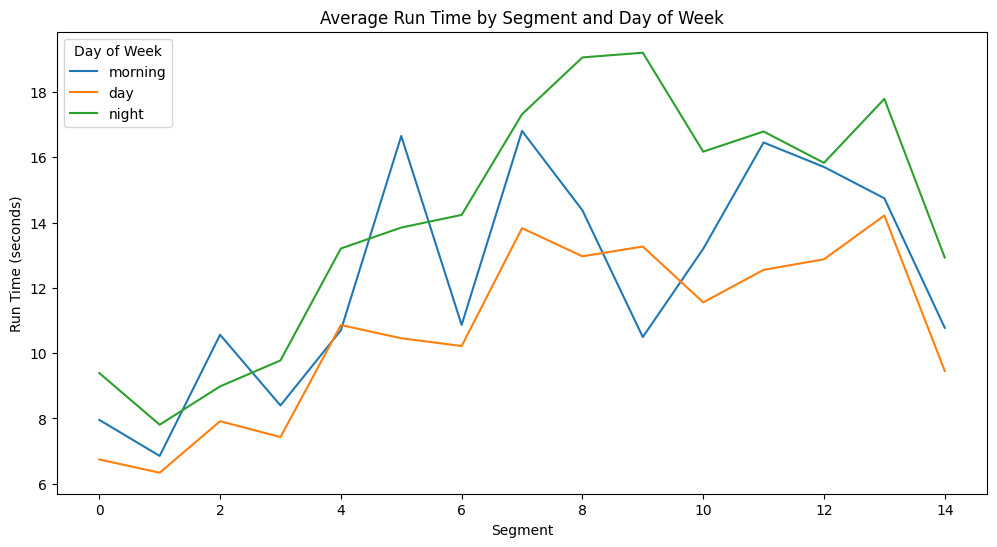

In [48]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_time_of_day = means_and_maxima_minima_counts_with_time_of_day.groupby(['segment', 'time_of_day'])['speed'].mean().reset_index()

# plot grp_by_day_0f_week dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_time_of_day
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_time_of_day, x='segment', y='speed', hue='time_of_day')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average speed by time_of_day')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()


In [50]:
# left join time_of_day from means_and_maxima_minima_counts_with_time_of_day to bus_running_times_feature_added_all_moddedDF on trip_id and segment
bus_running_times_feature_added_all_moddedDF_tod = pd.merge(bus_running_times_feature_added_all_moddedDF, means_and_maxima_minima_counts_with_time_of_day[['trip_id', 'segment', 'time_of_day']], on=['trip_id', 'segment'], how='left')
bus_running_times_feature_added_all_moddedDF_tod.dropna(inplace=True)
bus_running_times_feature_added_all_moddedDF_tod

,trip_id,deviceid,direction,segment,date,start_time,end_time,run_time,run_time_in_seconds,length,day_of_week,time_of_day_x,Sunday/holiday,saturday,weekday/end,week_no,rt(w-1),rt(w-2),rt(w-3),rt(t-1),rt(t-2),rt(n-1),rt(n-2),rt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,dt(n-1),time_of_day_y
0,4890.0,262.0,1.0,1.0,2021-10-01,06:39:49,06:40:58,0 days 00:01:09,69.0,0.6261,4.0,6.50,0.0,0,1,1.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,96.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,0.0,day
1,4890.0,262.0,1.0,2.0,2021-10-01,06:42:12,06:45:42,0 days 00:03:30,210.0,1.2808,4.0,6.50,0.0,0,1,1.0,247.0,247.0,247.0,247.0,247.0,69.0,247.0,247.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,74.0,day
2,4890.0,262.0,1.0,3.0,2021-10-01,06:45:42,06:53:58,0 days 00:08:16,496.0,2.1125,4.0,6.75,0.0,0,1,1.0,506.0,506.0,506.0,506.0,506.0,210.0,69.0,506.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,0.0,day
3,4890.0,262.0,1.0,4.0,2021-10-01,06:54:04,06:57:19,0 days 00:03:15,195.0,1.5513,4.0,6.75,0.0,0,1,1.0,192.0,192.0,192.0,192.0,192.0,496.0,210.0,69.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,6.0,day
4,4890.0,262.0,1.0,5.0,2021-10-01,06:57:19,06:58:56,0 days 00:01:37,97.0,0.8450,4.0,6.75,0.0,0,1,1.0,114.0,114.0,114.0,114.0,114.0,195.0,496.0,210.0,6.0,1.0,10.0,20.0,0.000,6.1,Partially cloudy,0.0,day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121920,3461.0,123.0,1.0,10.0,2022-10-31,17:37:22,17:40:36,0:03:14,194.0,1.2300,0.0,17.50,0.0,0,1,42.0,193.0,193.0,158.0,146.0,268.0,39.0,94.0,55.0,17.0,31.0,10.0,25.3,0.269,0.1,"Rain, Overcast",15.0,day
121921,3461.0,123.0,1.0,11.0,2022-10-31,17:40:36,17:43:39,0:03:03,183.0,1.1000,0.0,17.50,0.0,0,1,42.0,172.0,166.0,156.0,242.0,116.0,194.0,39.0,94.0,17.0,31.0,10.0,25.3,0.269,0.1,"Rain, Overcast",0.0,day
121922,3461.0,123.0,1.0,12.0,2022-10-31,17:43:49,17:46:42,0:02:53,173.0,1.3100,0.0,17.50,0.0,0,1,42.0,183.0,170.0,172.0,142.0,150.0,183.0,194.0,39.0,17.0,31.0,10.0,25.3,0.269,0.1,"Rain, Overcast",10.0,day
121923,3461.0,123.0,1.0,13.0,2022-10-31,17:46:44,17:49:06,0:02:22,142.0,1.1500,0.0,17.75,0.0,0,1,42.0,149.0,149.0,161.0,149.0,134.0,173.0,183.0,194.0,17.0,31.0,10.0,25.3,0.269,0.1,"Rain, Overcast",2.0,day


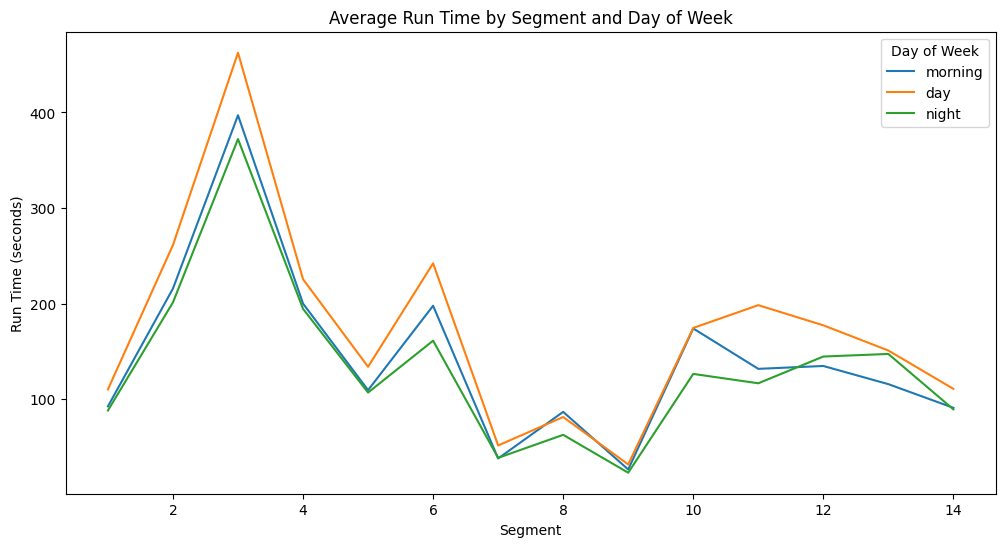

In [51]:
# grop bus_running_times_feature_added_all_moddedDF dataframe by segment and day_of_week and take the mean of run_time_in_seconds
grp_by_time_of_day = bus_running_times_feature_added_all_moddedDF_tod.groupby(['segment', 'time_of_day_y'])['run_time_in_seconds'].mean().reset_index()

# plot grp_by_time_of_day dataframe in a line graph taking segment as x axis and run_time_in_seconds as y axis and day_of_week as hue
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped your DataFrame as grp_by_time_of_day
# If not, you can use your existing code to create it

# Create a line plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=grp_by_time_of_day, x='segment', y='run_time_in_seconds', hue='time_of_day_y')

# Set plot labels and title
plt.xlabel('Segment')
plt.ylabel('Run Time (seconds)')
plt.title('Average Run Time by Segment and Day of Week')

# Show the legend
plt.legend(title='Day of Week')

# Show the plot
plt.show()

In [36]:
# i want to take the average of speed, acceleration, radial_acceleration, acceleration_der, throttle_count, break_count for each deviceid and time_of_day per each segment
# List of features you want to calculate the mean for
features_to_mean = ['speed', 'acceleration', 'radial_acceleration', 'throttle_count', 'break_count']  # Replace with your actual feature names
avg_for_devID_time_of_day_and_segment = means_and_maxima_minima_counts_with_time_of_day.groupby(['deviceid', 'time_of_day', 'segment'])[features_to_mean].mean().reset_index()



In [37]:
avg_for_devID_time_of_day_and_segment.head (50)

,deviceid,time_of_day,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0.0,NaN,NaN,NaN,NaN,NaN
1,116.0,morning,1.0,NaN,NaN,NaN,NaN,NaN
2,116.0,morning,2.0,NaN,NaN,NaN,NaN,NaN
3,116.0,morning,3.0,NaN,NaN,NaN,NaN,NaN
4,116.0,morning,4.0,NaN,NaN,NaN,NaN,NaN
5,116.0,morning,5.0,NaN,NaN,NaN,NaN,NaN
6,116.0,morning,6.0,NaN,NaN,NaN,NaN,NaN
7,116.0,morning,7.0,NaN,NaN,NaN,NaN,NaN
8,116.0,morning,8.0,NaN,NaN,NaN,NaN,NaN
9,116.0,morning,9.0,NaN,NaN,NaN,NaN,NaN


In [38]:
import pandas as pd
import numpy as np

# List of features (columns) to consider for filling NaN values
features_to_fill = avg_for_devID_time_of_day_and_segment.columns.difference(['deviceid', 'time_of_day', 'segment'])

# Calculate the mean without considering 'time_of_day' for the selected features
for feature in features_to_fill:
    avg_for_devID_time_of_day_and_segment[feature] = avg_for_devID_time_of_day_and_segment.groupby(['deviceid', 'segment'])[feature].transform(lambda x: x.fillna(x.mean()))


In [39]:
avg_for_devID_time_of_day_and_segment.head (50)

,deviceid,time_of_day,segment,speed,acceleration,radial_acceleration,throttle_count,break_count
0,116.0,morning,0.0,8.505397,-0.140236,0.432507,13.977379,11.106361
1,116.0,morning,1.0,7.000882,0.037695,0.302234,1.041507,0.880564
2,116.0,morning,2.0,8.479835,0.012879,0.490989,2.744903,1.316206
3,116.0,morning,3.0,9.385685,-0.003781,0.579622,6.464635,5.526108
4,116.0,morning,4.0,13.542030,-0.046590,0.403892,3.233826,3.485854
5,116.0,morning,5.0,13.784779,0.054172,0.306161,1.575013,1.441331
6,116.0,morning,6.0,12.834410,0.014568,0.910734,2.462703,2.817810
7,116.0,morning,7.0,15.688127,0.300322,0.547362,0.014528,0.029003
8,116.0,morning,8.0,16.193032,0.015556,1.238910,0.437198,0.501208
9,116.0,morning,9.0,17.867662,-0.006646,0.637314,1.669082,2.061594


In [40]:
# save csv file
avg_for_devID_time_of_day_and_segment.to_csv('../DataOut/avg_for_devID_time_of_day_and_segment.csv',index=False)